In [6]:
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
df= pd.read_csv("classdata.csv")


In [8]:
df["categories"]

0      文学 literature
1      文学 literature
2      文学 literature
3      文学 literature
4      文学 literature
5      文学 literature
6      文学 literature
7      文学 literature
8      文学 literature
9      文学 literature
10     文学 literature
11     文学 literature
12     文学 literature
13     文学 literature
14     文学 literature
15     文学 literature
16       语言 language
17       语言 language
18       语言 language
19       语言 language
20       语言 language
21       语言 language
22       语言 language
23       语言 language
24       语言 language
25       语言 language
26       语言 language
27       语言 language
28       语言 language
29       语言 language
           ...      
411     计算机 computer
412     计算机 computer
413     计算机 computer
414     计算机 computer
415     计算机 computer
416     计算机 computer
417     计算机 computer
418     计算机 computer
419     计算机 computer
420     计算机 computer
421     计算机 computer
422     计算机 computer
423      医学 medicine
424      医学 medicine
425      医学 medicine
426      医学 medicine
427      医学 m

In [9]:
cates=df["categories"].value_counts()
cates

演讲 speech          62
艺术 art             31
社会 sociology       29
管理 management      26
经济 economics       25
计算机 computer       25
物理 physics         23
化学 chemistry       22
生物 biology         20
历史 history         19
地球科学 geoscience    18
数学 mathematics     18
医学 medicine        18
心理 psychology      17
文学 literature      16
教育 education       15
语言 language        14
哲学 philosophy      11
法律 law             10
宗教 religion         8
政治 politics         7
传播 media            4
地理 geography        3
Name: categories, dtype: int64

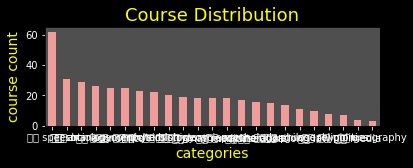

In [10]:
fig1 = plt.figure(1,facecolor = 'black')
ax1 = fig1.add_subplot(2,1,1,facecolor='#4f4f4f',alpha=0.1)
plt.tick_params(colors='white')
cates.plot(kind='bar',rot=0,color='#ef9d9a')
title = plt.title('Course Distribution',fontsize=18,color='yellow')
xlabel = plt.xlabel('categories',fontsize=14,color='yellow')
ylabel = plt.ylabel('course count',fontsize=14,color='yellow')

According to the cahrt, most of the rideos are about the Speech, and the cate of Geography ranked last. 
The top three cates are all about fine arts and social science, and among all categories, there is a tendency that more fine art and social science courses than science and technology courses.

In [11]:
def check_name(x):
    return "斯坦福" in x
df["vedios"].apply(check_name).value_counts()

False    387
True      54
Name: vedios, dtype: int64

I want to check out the number of videos from Stanford, so I use "def" to define a new function.

In [12]:
def count_school(name):
    def check_name(x):
        return name in x
    return df["vedios"].apply(check_name).value_counts()[True]

In [13]:
count_school("麻省")

47

In [14]:
count_school("哈佛")

16

In [15]:
count_school("耶鲁")

41

In [16]:
count_school("牛津")

16

In [17]:
count_school("剑桥")

6

In [18]:
count_school("斯坦福")

54

In [19]:
count_school("英国公开")

8

After I apply a new function--count_school, based on the former step, I can easily check the number of videos from different school.As We can see there are 54 videos are from Stanford University，47 videos are from MIT，41 arefrom Yale, and 16 are from Harvard and Oxford respectively，and 6 are from Cambridge. 

As we can see, the major job of the Global University open class of Netease is about translating the original English version to a Chinese version . So the amount of the videos of different school on the website is result from their own school's release system. 

Why Stanford has a large amount of online education videos? It must mention the Coursera /kərˈsɛrə/. It is a venture-backed, education-focused technology company founded by Stanford professors Andrew Ng and Daphne Koller that offers online courses. Coursera works with universities and other organizations to offer online courses, specializations, and degrees in a variety of subjects, such as engineering, humanities, medicine, biology, social sciences, mathematics, business, computer science, digital marketing, data science, and others. So, based on such a big online education system, it is easy to explain why large part of the videos are from Stanford.  

After Coursera, another massive open online course provider, edX, is created by MIT and Harvard University. So there are also many online courses are from those two schools.

In a nut shell, the openness of online course resources in different is a main reason of this distribution.



In [20]:
sta=df[df["vedios"].apply(check_name)]

In [21]:
sta["categories"].value_counts()

管理 management      13
计算机 computer       11
演讲 speech           6
医学 medicine         4
社会 sociology        3
物理 physics          3
地球科学 geoscience     3
历史 history          2
艺术 art              2
经济 economics        2
地理 geography        1
心理 psychology       1
数学 mathematics      1
生物 biology          1
法律 law              1
Name: categories, dtype: int64

I then create a new form of Stanford's online courses named "sta" to do more reasearch.

After I count the category of the videos, I find that most videos are about management and computer.

According to the report，Stanford Graduate School of Business ranked No.1 together with Yale Business school in America for a long time. 
Also, the computer science of Stanford ranked top3 around the world.

So, it is reasonable to have most classes on these area.

In [22]:
import jieba

In [23]:
list(jieba.cut(sta["vedios"][53]))

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/hj/cfhxjv_j6nn120wl6chbg_c00000gn/T/jieba.cache
Loading model cost 1.497 seconds.
Prefix dict has been built succesfully.


['斯坦福大学', '《', '美国', '研究', '》']

In [33]:
all_text=[]
for text in sta["vedios"]:
    all_text.extend(list(jieba.cut(text)))

In [25]:
word_count={}
for word in all_text:
    if word not in word_count:
        word_count[word]=1
    else:
        word_count[word]=word_count[word]+1

In [27]:
pd.Series(word_count).to_frame().reset_index()

,index,0
0,,5
1,(,1
2,),1
3,2010,1
4,2014,1
5,7,2
6,8,1
7,America,1
8,CEO,6
9,Dropbox,1


In [28]:
pd.Series(word_count).sort_values(ascending=False)

《         52
》         52
斯坦福大学     29
斯坦福       25
谈          8
演讲         8
创业         7
CEO        6
创始人        6
的          6
           5
和          5
美国         4
与          4
应用         4
开发         4
：          3
企业         3
发展         3
—          3
编程         3
iPhone     2
生物学        2
分享         2
iOS        2
eBay       2
·          2
思想         2
人          2
研究         2
          ..
夫妇         1
讲座         1
学习         1
学过         1
学院         1
年冬         1
广义         1
应对         1
颠覆         1
弦          1
微软         1
心理学家       1
忘掉         1
总监         1
机器         1
总统         1
总裁         1
戴尔         1
手机         1
技术开发       1
抽象         1
探索         1
教程         1
斗争         1
过去         1
达尔文        1
方法学        1
时代         1
普拉特        1
学          1
Length: 163, dtype: int64

In [29]:
!pip install wordcloud

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [30]:
from wordcloud import WordCloud

In [31]:
cloud=WordCloud(
    font_path="simfang.ttf",
    background_color= "White",
    width=1400,
    height=1400,
    margin=2,
    max_words=2000
)

(-0.5, 1399.5, 1399.5, -0.5)

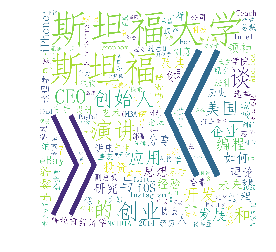

In [32]:
word_cloud = cloud.generate_from_frequencies(word_count)
plt.imshow(word_cloud)
plt.axis("off")

I used jieba to cut the text in the couses titles into words. Then I find out the words used most (Except the university name) were like，"talk", "entrepreneurship".By using the wordclod, the words were showed in the picture.